#<font size="4"><b><font color="red">Etapa 1</font></b>: Carregando o dataset de imagens disponível no Drive
</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import zipfile

# Caminhos
zip_drive_path = '/content/drive/MyDrive/Datasets/COVID-19_Radiography_Dataset.zip'
#/content/drive/MyDrive/Datasets/COVID-19_Radiography_Dataset.zip
zip_local_path = '/content/COVID-19_Radiography_Dataset.zip'
extract_path = '/content/COVID-19_Radiography_Dataset'

# Verifica se o arquivo existe no Drive
if not os.path.exists(zip_drive_path):
    print(f"Erro: Arquivo .zip não encontrado em: {zip_drive_path}")
else:
    # Copia o .zip para o ambiente local, se ainda não estiver lá
    if not os.path.exists(zip_local_path):
        shutil.copy(zip_drive_path, zip_local_path)
        print("Arquivo .zip copiado para o Colab.")

    # Remove pasta de destino anterior, se existir
    shutil.rmtree(extract_path, ignore_errors=True)

    # Descompacta o .zip
    with zipfile.ZipFile(zip_local_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print(f"Descompactado em: {extract_path}")


Arquivo .zip copiado para o Colab.
Descompactado em: /content/COVID-19_Radiography_Dataset


#<font size="4"><b><font color="red">Etapa 2</font></b>: Importação dos dados para um dataframe Pandas
</font>

1. Pensando em limpeza dos dados, verificaremos se há alguma imagem corrompida ou duplicada, e se houver, removemos.

2. Depois, criaremos um DataFrame contendo apenas o nome do arquivo da imagem (filename) e sua classe (label), pensando na tarefa de classificação.

In [ ]:
import os
import pandas as pd
from PIL import Image, UnidentifiedImageError

# Caminho base onde estão as subpastas 'COVID', 'Normal', etc.
base = '/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset'

# Lista com os nomes das classes, que correspondem às subpastas
classes = ['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity']

dados = []

# Percorre as classes e coleta apenas imagens válidas
for cls in classes:
    img_dir = os.path.join(base, cls, 'images')
    for fname in os.listdir(img_dir):
        if not fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        img_path = os.path.join(img_dir, fname)

        # Verifica se o arquivo pode ser aberto (não está corrompido)
        try:
            with Image.open(img_path) as img:
                img.verify()  # Verifica integridade da imagem
        except (UnidentifiedImageError, OSError):
            print(f"Arquivo corrompido ignorado: {img_path}")
            continue

        dados.append({
            'filename': fname,
            'label': cls
        })

# Criação do DataFrame com os dados de interesse
df = pd.DataFrame(dados)

# Remove duplicatas por nome de arquivo
df = df.drop_duplicates(subset='filename')

# Exibe quantas imagens são válidas e quantas duplicatas foram removidas
print(f"Total de imagens válidas: {len(df)}")
print(f"Total de duplicatas removidas: {len(dados) - len(df)}")

# Exibe total de imagens e uma amostra do DataFrame
print(f"Total de imagens: {len(df)} \n")
print(df.head())


Total de imagens válidas: 21165
Total de duplicatas removidas: 0
Total de imagens: 21165 

         filename  label
0  COVID-2661.png  COVID
1  COVID-3616.png  COVID
2  COVID-1079.png  COVID
3  COVID-2991.png  COVID
4  COVID-1338.png  COVID


#<font size="4"><b><font color="red">Etapa 3</font></b>: Verificação das dimensões do dataframe
</font>
Passo importante para garantir que os dados foram carregados corretamente e não há problemas óbvios, como um DataFrame vazio ou colunas ausentes.


In [ ]:
# Verifica as dimensões do DataFrame
print(f"Formato do DataFrame: {df.shape}\n")  # (linhas, colunas)

# Exibe os nomes das colunas
print(f"Colunas: {df.columns.tolist()}\n")

# Verifica se há valores ausentes
print(f"Valores ausentes por coluna:\n{df.isnull().sum()}")

# Visualiza as primeiras linhas
print("\nAmostra dos dados:")
print(df.head())


Formato do DataFrame: (21165, 2)

Colunas: ['filename', 'label']

Valores ausentes por coluna:
filename    0
label       0
dtype: int64

Amostra dos dados:
         filename  label
0  COVID-2661.png  COVID
1  COVID-3616.png  COVID
2  COVID-1079.png  COVID
3  COVID-2991.png  COVID
4  COVID-1338.png  COVID


###**Interpretação inicial da base de dados**

1. A base de dados COVID-19 Radiography Dataset contém imagens de raio-X de tórax organizadas em subpastas por classe (**COVID, Normal, Viral Pneumonia e Lung_Opacity**).

2. Os dados estão disponíveis publicamente no Kaggle:
(https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database)

3. Após extração, foram identificadas 4 classes principais, cada uma armazenada em uma pasta própria com subpastas images/ (e opcionalmente masks/).

4. O conjunto de dados é composto por imagens individuais, sendo cada arquivo correspondente a um exame de raio-X de um paciente. Não há duplicações explícitas de nomes de arquivos dentro de cada classe.

5. O DataFrame criado contém **`21.165`** linhas e **`2`** colunas:
  
  **filename:** nome do arquivo de imagem (ex: COVID-123.png)
  
  **label:** classe da imagem (ex: COVID)

6. Os arquivos de máscara (da subpasta masks/) não foram incluídos nesta etapa, pois não são necessários para tarefas de classificação de imagens.

7. Os dados não incluem informações demográficas ou clínicas associadas aos pacientes, portanto a análise será baseada exclusivamente nas imagens e seus rótulos.

#<font size="4"><b><font color="red">Etapa 4</font></b>: Descrição das variáveis do dataset
</font>

In [ ]:
# Tabela com a descrição das "variáveis" do dataset de imagens
descricao_imagens = pd.DataFrame([
    {"Variável": "filename", "Tipo": "Texto", "Descrição": "Nome do arquivo de imagem"},
    {"Variável": "label", "Tipo": "Categórica", "Descrição": "Rótulo da imagem (ex: COVID, NORMAL, PNEUMONIA)"}
])

# Exibir o DataFrame no Colab
descricao_imagens

,Variável,Tipo,Descrição
0,filename,Texto,Nome do arquivo de imagem
1,label,Categórica,"Rótulo da imagem (ex: COVID, NORMAL, PNEUMONIA)"


#<font size="4"><b><font color="red">Etapa 5</font></b>: Análise descritiva das classes possíveis para a variável "label"
</font>



In [ ]:
# Tabela com a descrição das "classes" representadas pela variável "label"
descricao_classes = pd.DataFrame([
    {"Classe": "COVID", "Descrição": "Imagens de raio-X de tórax de pacientes com diagnóstico confirmado de COVID-19."},
    {"Classe": "Normal", "Descrição": "Imagens de raio-X de tórax sem sinais visíveis de doenças pulmonares."},
    {"Classe": "Viral pneumonia", "Descrição": "Imagens de raio-X de tórax de pacientes com pneumonia viral não relacionada à COVID-19."},
    {"Classe": "Lung_Opacity", "Descrição": "Imagens de raio-X de tórax com alterações pulmonares visíveis (opacidades), mas sem diagnóstico definido como COVID-19 ou pneumonia viral. Representa uma categoria intermediária."}
])

# Exibir o DataFrame no Colab
descricao_classes

,Classe,Descrição
0,COVID,Imagens de raio-X de tórax de pacientes com di...
1,Normal,Imagens de raio-X de tórax sem sinais visíveis...
2,Viral pneumonia,Imagens de raio-X de tórax de pacientes com pn...
3,Lung_Opacity,Imagens de raio-X de tórax com alterações pulm...


#<font size="4"><b><font color="red">Etapa 6</font></b>: Análise descritiva das variáveis do dataset
</font>

In [ ]:
import plotly.express as px
import pandas as pd

def analisar_distribuicao_classes(df, coluna='label'):
    # Conta a frequência absoluta e relativa de cada classe
    freq_abs = df[coluna].value_counts()
    freq_rel = df[coluna].value_counts(normalize=True) * 100

    # Cria um DataFrame com os dados organizados
    freq_df = pd.DataFrame({
        coluna: freq_abs.index,
        'frequencia': freq_abs.values,
        'percentual': freq_rel.values.round(1)
    })

    # Coluna para exibir no gráfico (ex: "234 (17.2%)")
    freq_df['texto'] = freq_df.apply(
        lambda row: f"{int(row['frequencia'])} ({row['percentual']}%)", axis=1
    )

    # Gráfico de barras com frequência absoluta
    fig_bar = px.bar(
        freq_df,
        x=coluna,
        y='frequencia',
        text='texto',
        title=f"<b>Distribuição das classes: <span style='color:red'>{coluna.upper()}</span></b>",
        labels={
            'frequencia': 'Frequência Absoluta',
            coluna: 'Classe da Imagem'
        },
        color=coluna,
        color_discrete_sequence=px.colors.qualitative.Pastel
    )
    fig_bar.update_traces(textposition='outside')
    fig_bar.update_layout(
        yaxis_title='Frequência Absoluta',
        xaxis_title='Classe',
        showlegend=False,
        title={'x': 0.5}
    )
    fig_bar.show()

    # Gráfico de pizza com percentual por classe
    fig_pie = px.pie(
        freq_df,
        names=coluna,
        values='frequencia',
        title="<b>Proporção de imagens por classe</b>",
        hole=0.4,
        color=coluna,
        color_discrete_sequence=px.colors.qualitative.Pastel
    )
    fig_pie.update_traces(textinfo='percent+label')
    fig_pie.update_layout(title={'x': 0.5})
    fig_pie.show()

# Executar a função
analisar_distribuicao_classes(df)


### **Insights iniciais obtidos a partir da análise descritiva dos dados**

1. Cerca de 48% dos pacientes não receberam nenhum diagnóstico de doença, sua radiografia foi considerada normal. Essa é a classe com o maior número de imagens.

2. Cerca de 28% dos pacientes tiveram radiografias mostrando alterações visíveis na densidade pulmonar, porém sem serem diagnosticados com COVID ou pneumonia viral.

3. Cerca de 17% dos pacientes foram diagnosticados com COVID.

4. Cerca de 6% dos pacientes foram diagnosticados com pneumonia viral. Essa é a classe com menor número de imagens.

5. A base é desbalanceada entre classes, o que pode impactar o desempenho de modelos de classificação, especialmente para a classe "Viral Pneumonia", que possui bem menos exemplos. Iremos considerar estratégias de balanceamento mais pra frente.

6. A classe “Lung_Opacity” representa um desafio diagnóstico: apesar de ter uma quantidade significativa de imagens (~28%), ela não está ligada a um diagnóstico específico.

7. A base não contém variáveis clínicas ou demográficas, como idade, sexo ou sintomas. Isso significa que o modelo terá que se basear exclusivamente nos padrões visuais das radiografias para realizar a classificação, o que aumenta o desafio e também a relevância da qualidade das imagens.

#<font size="4"><b><font color="red">Etapa 7</font></b>: Teste com pergunta que queremos responder
</font>

A primeira pergunta de pesquisa que buscamos responder é:

> **“Quais são os principais padrões radiológicos nas imagens de pacientes com COVID-19, e os modelos de visão computacional conseguem distinguir a COVID de outras doenças pulmonares?”**

Para isso, faremos uma análise visual inicial das radiografias das três classes associadas a alterações pulmonares: `COVID`, `Viral Pneumonia` e `Lung_Opacity`.

Essa etapa nos permite:
- Observar padrões comuns e diferenças visuais entre as condições.
- Confirmar se há indícios visíveis que justifiquem a distinção automatizada.
- Apoiar o entendimento do modelo em etapas posteriores de treinamento e explicação.

A seguir, apresentamos exemplos de imagens reais por classe para apoiar essa investigação visual.


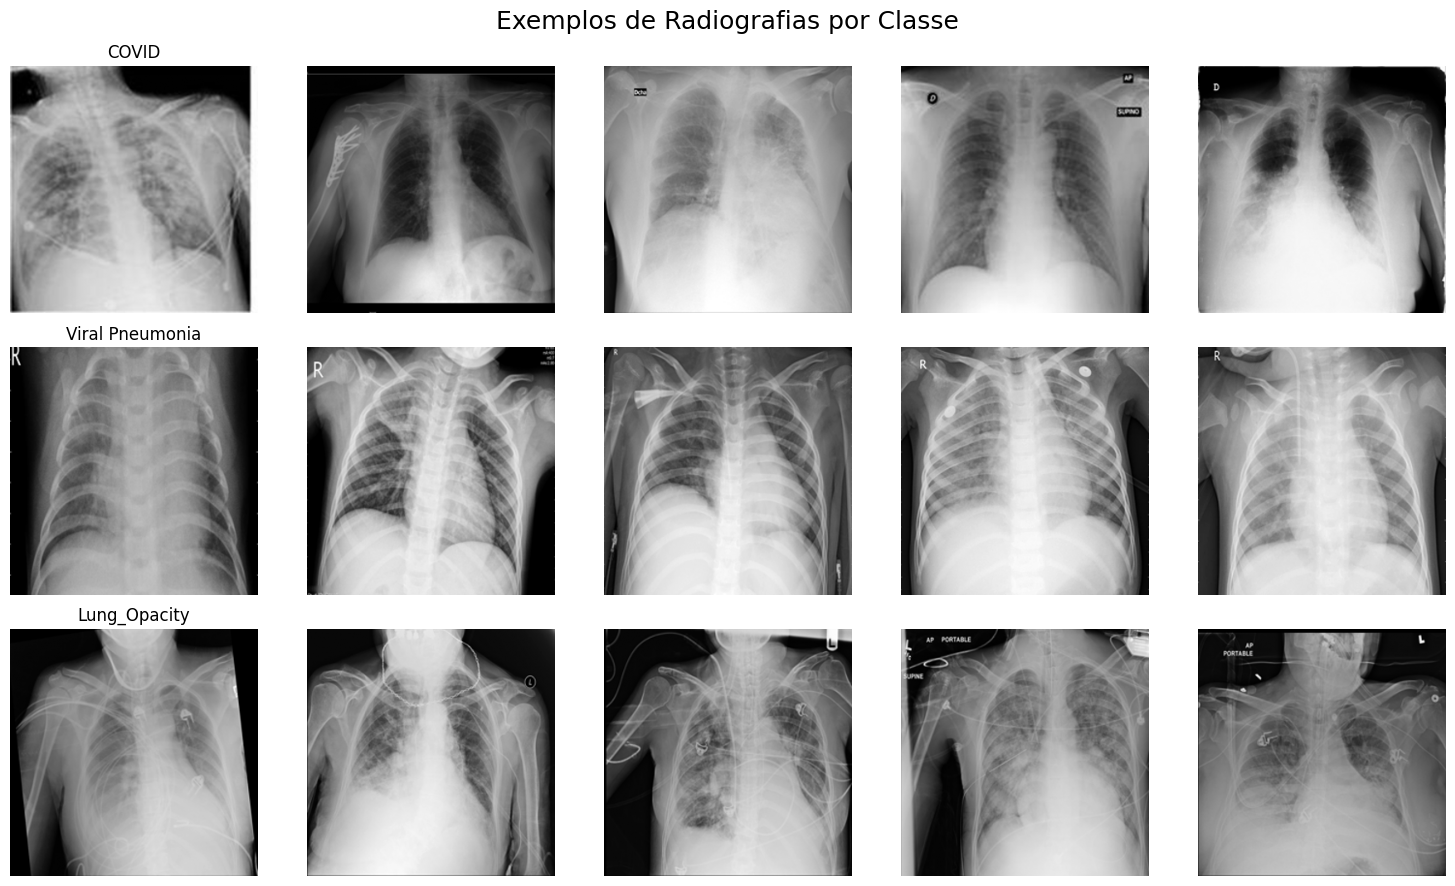

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Caminho base onde estão as imagens
base_dir = '/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset'

# Classes que queremos visualizar
classes = ['COVID', 'Viral Pneumonia', 'Lung_Opacity']
n_imagens = 5  # Número de imagens por classe

# Tamanho da figura
plt.figure(figsize=(15, 9))

# Laço para plotar imagens por classe
for i, classe in enumerate(classes):
    class_path = os.path.join(base_dir, classe, "images")

    # Filtra apenas arquivos de imagem válidos
    imagens = [f for f in os.listdir(class_path)
               if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    amostras = random.sample(imagens, min(n_imagens, len(imagens)))

    for j, img_nome in enumerate(amostras):
        img_path = os.path.join(class_path, img_nome)
        img = mpimg.imread(img_path)

        plt.subplot(len(classes), n_imagens, i * n_imagens + j + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(classe if j == 0 else "")

plt.suptitle('Exemplos de Radiografias por Classe', fontsize=18)
plt.tight_layout()
plt.show()

## Análise Qualitativa dos Padrões Visuais

Após a visualização inicial, algumas observações preliminares podem ser feitas com base nas radiografias exibidas:

- **COVID-19**:
  - Tendência a apresentar **opacidades em vidro fosco**, com distribuição **bilateral** e **periférica**.
  - Em muitos casos, observa-se acometimento dos **lóbulos inferiores**.
  
- **Pneumonia Viral**:
  - Padrões de **infiltrados mais localizados**, frequentemente **assimétricos**.
  - Pode aparecer em apenas um lobo ou como áreas de consolidação isoladas.

- **Lung Opacity**:
  - Categoria mais ampla e heterogênea, com sinais que podem variar de **atelectasias** a **consolidações difusas**.
  - Em alguns casos, a diferenciação visual com COVID-19 pode ser sutil.

### Hipótese Visual
Com base na observação, é possível identificar **padrões que justificam a distinção automatizada por meio de modelos de visão computacional**. Embora existam semelhanças entre algumas classes (como opacidades difusas em COVID-19 e Lung Opacity), as características gerais parecem suficientes para a **aprendizagem supervisionada**.

Essa análise reforça a importância de treinar modelos que captem nuances específicas dessas condições pulmonares.

Nos próximos passos, partiremos para a **análise quantitativa** e **modelagem com aprendizado profundo**.


#<font size="4"><b><font color="red">Etapa 8</font></b>: Análise Exploratória de Dados (EDA)
</font>


Nesta etapa, realizamos uma análise exploratória para entender melhor o conjunto de dados de radiografias torácicas. Nosso objetivo é:

- Observar a distribuição de imagens por classe;
- Verificar possíveis desequilíbrios entre as categorias;
- Avaliar as estatísticas básicas dos valores de intensidade de pixels.

Essas análises são importantes para garantir que o dataset esteja balanceado, bem formatado e adequado para o treinamento de modelos de visão computacional.

### 1. Contagem de Imagens por Classe

Visualizamos a quantidade de imagens disponíveis para cada classe (COVID, Pneumonia Viral e Lung Opacity).

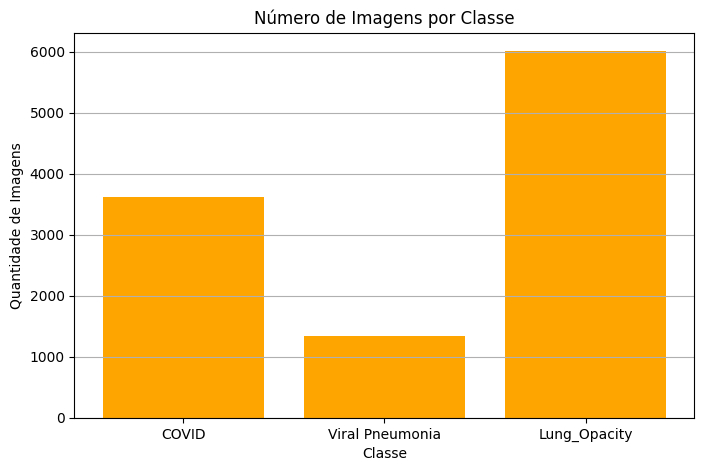

Contagem por classe:

COVID: 3616 imagens
Viral Pneumonia: 1345 imagens
Lung_Opacity: 6012 imagens


In [ ]:
import os
import matplotlib.pyplot as plt

# Caminho base onde estão as imagens
base_dir = '/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset'
classes = ['COVID', 'Viral Pneumonia', 'Lung_Opacity']

# Conta quantas imagens há em cada pasta
contagem_por_classe = {}
for classe in classes:
    class_path = os.path.join(base_dir, classe, 'images')
    imagens = [f for f in os.listdir(class_path)
               if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    contagem_por_classe[classe] = len(imagens)

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(contagem_por_classe.keys(), contagem_por_classe.values(), color='orange')
plt.title('Número de Imagens por Classe')
plt.ylabel('Quantidade de Imagens')
plt.xlabel('Classe')
plt.grid(axis='y')
plt.show()

# Imprime as contagens
print("Contagem por classe:\n")
for k, v in contagem_por_classe.items():
    print(f"{k}: {v} imagens")


### 2. Verificação de Desequilíbrio entre Classes

Calculamos a proporção de cada classe em relação ao total de imagens disponíveis.


In [ ]:
#Soma a contagem por classe feita no passo anterior
total = sum(contagem_por_classe.values())
print("Distribuição percentual por classe:\n")

#Imprime o percentual presente em cada classe
for k, v in contagem_por_classe.items():
    percentual = 100 * v / total
    print(f"{k}: {percentual:.2f}%")


Distribuição percentual por classe:

COVID: 32.95%
Viral Pneumonia: 12.26%
Lung_Opacity: 54.79%


### 3. Estatísticas dos Valores de Intensidade de Pixels

Calculamos a média e o desvio padrão da intensidade dos pixels de cada imagem para verificar a distribuição dos tons na imagem.

Essas métricas são fundamentais por três razões:

1. **Diagnóstico de qualidade do dataset**  
   - A média dos pixels ajuda a entender o quão clara ou escura é uma imagem, em média.
   - O desvio padrão mostra se a imagem tem **contraste suficiente** (diferença entre partes claras e escuras).

2. **Normalização dos dados**  
   - Modelos de deep learning (como CNNs) **convergem mais rápido** quando os dados têm média próxima de 0 e desvio padrão próximo de 1.
   - Essas estatísticas podem ser usadas para **normalizar** as imagens antes do treinamento:
     \[
     \text{pixel\_normalizado} = \frac{pixel - \mu}{\sigma}
     \]

3. **Detecção de outliers visuais**  
   - Imagens com média ou desvio padrão muito fora do padrão esperado podem estar **corrompidas**, **muito escuras/clara demais**, ou ter **problemas de aquisição**.
   - Isso ajuda a decidir se vale a pena fazer uma limpeza no dataset.

Em resumo, essas estatísticas não só ajudam no entendimento do comportamento visual das imagens, como também são insumo direto para o pré-processamento adequado antes de treinar modelos.


In [ ]:
import numpy as np                          # Para operações matemáticas (média, desvio padrão, etc.)
from tqdm import tqdm                       # Para exibir uma barra de progresso no loop
import matplotlib.image as mpimg            # Para carregar imagens em formato array

# Listas para armazenar os resultados das imagens
medias = []      # Lista para armazenar a média dos pixels de cada imagem
desvios = []     # Lista para armazenar o desvio padrão dos pixels de cada imagem

# Loop para percorrer as classes (COVID, Pneumonia Viral, Lung Opacity)
for classe in classes:
    class_path = os.path.join(base_dir, classe, 'images')  # Caminho para as imagens da classe
    imagens = [f for f in os.listdir(class_path)           # Lista apenas os arquivos de imagem válidos
               if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Loop para processar cada imagem com barra de progresso
    for img_nome in tqdm(imagens, desc=f"Processando {classe}"):
        img_path = os.path.join(class_path, img_nome)  # Caminho completo da imagem
        img = mpimg.imread(img_path)                   # Carrega a imagem como array NumPy

        # Calcula a média e o desvio padrão dos valores de pixel
        medias.append(np.mean(img))        # Média da intensidade de pixels (0 a 1)
        desvios.append(np.std(img))        # Desvio padrão da intensidade

# Após processar todas as imagens, exibe estatísticas globais
print("Estatísticas de intensidade (normalizadas de 0 a 1):")
print(f"Média global: {np.mean(medias):.4f}")         # Média geral das intensidades das imagens
print(f"Desvio padrão global: {np.mean(desvios):.4f}") # Média dos desvios padrão (variação de tons)


Processando Lung_Opacity: 100%|██████████| 6012/6012 [00:10<00:00, 548.65it/s]

Estatísticas de intensidade (normalizadas de 0 a 1):
Média global: 0.5113
Desvio padrão global: 0.2222


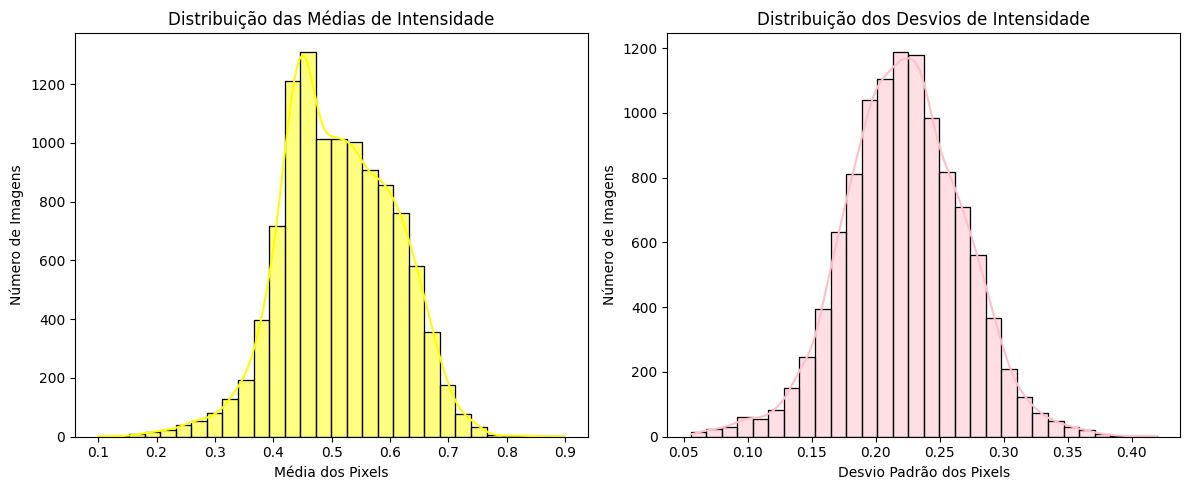

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráficos da distribuição das médias e desvios padrão
plt.figure(figsize=(12, 5))

# Histograma das médias de intensidade
plt.subplot(1, 2, 1)
sns.histplot(medias, bins=30, kde=True, color='yellow')
plt.title('Distribuição das Médias de Intensidade')
plt.xlabel('Média dos Pixels')
plt.ylabel('Número de Imagens')

# Histograma dos desvios de intensidade
plt.subplot(1, 2, 2)
sns.histplot(desvios, bins=30, kde=True, color='pink')
plt.title('Distribuição dos Desvios de Intensidade')
plt.xlabel('Desvio Padrão dos Pixels')
plt.ylabel('Número de Imagens')

plt.tight_layout()
plt.show()


**Média Global (0.5113):**

A média de 0.5113 sugere que as imagens estão, em média, próximas de um brilho moderado. Isso pode indicar que o dataset contém uma boa variedade de imagens que não são excessivamente escuras nem claras.

Se a média estivesse muito próxima de 0 (muitas áreas escuras) ou 1 (muitas áreas claras), poderia ser um sinal de que as imagens não estão balanceadas e poderiam afetar negativamente o desempenho do modelo.


**Desvio Padrão Global (0.2222):**

O desvio padrão de 0.2222 indica um nível razoável de contraste entre as imagens. Valores mais baixos significam que a variação das intensidades dos pixels não é muito grande; assim, a maioria dos pixels está concentrada perto da média.

**Resultado Satisfatório:**

A média e o desvio padrão indicam que o dataset é, em geral, razoável em relação a brilho e contraste.

As velocidades de processamento de cada categoria (COVID, Pneumonia Viral e Opacidade Pulmonar) indicam eficiência na organização e no acesso aos dados.

#<font size="4"><b><font color="red">Etapa 9</font></b>: Pré-processamento e treinamento do modelo
</font>

Para realizar nosso treinamento, optamos por três frentes:

* A primeira é um modelo para triagem facilitada que classifica se o pulmão está saudável ou não. Nós iremos o denominar de **"Modelo Binário"**. O objetivo deste modelo é **agilizar a triagem em uma urgência**, e respeitar a premissa de que **o diagnóstico final cabe ao médico**;
* A segunda abordagem é diferente da primeira, na qual vamos classificar em "normal, covid ou pneumonia". Considerando o contexto de que Lung_Opacity pode indicar uma característica inespecífica e não uma doença específica em si, neste modelo iremos desconsiderar esta classe para evitar confusão diagnóstica com outras doenças. O denominaremos de **"Modelo Ternário"**. O seu objetivo é ser mais específico ao classificar as doenças em si, mas ainda desconsiderar esta condição que pode confundir o modelo.
* A última abordadem, o qual denominamos de **"Modelo Quartenário"** tem o objetivo de classificar **todas** as condições (classes: Normal, Covid, Pneumonia e Lung Opacity), visando englobar a **maior especificidade de condições diagnóstica**, ainda que Lung_Opacity seja inespecífico.

No final do treinamento e avaliação dos 3 modelos, será feito uma conclusão comparando todos.

### Treinamento do Modelo Binário

Foi definido a criação de um modelo de **classificação binária** para auxiliar na visualização precisa de algum tipo de risco (pneumonia, covid ou opacidade) ou pulmão em estado normal/saudável em uma emergência.

* O objetivo deste modelo é **reduzir o tempo da triagem**, neste caso é verificar quais são os casos de **risco** que merecem **encaminhamento médico especializado e observação**.
* Este modelo tem a premissa de apenas facilitar a triagem, considerando que **o diagnóstico final cabe ao médico.**

#### Etapa: Preparação para Classificação Binária
Neste passo, vamos transformar as classes originais em duas categorias:
- **0 (normal)**: pulmões saudáveis
- **1 (doente)**: qualquer tipo de comprometimento pulmonar (covid, pneumonia, opacidade)


In [ ]:
# Mapeamento de classes para binário
df['binary_class'] = df['label'].apply(lambda x: 0 if x == 'Normal' else 1)

# Adiciona caminho absoluto das imagens
df['filepath'] = df.apply(lambda row: os.path.join(base, row['label'], 'images', row['filename']), axis=1)

# Visualizar
df.head()

,filename,label,binary_class,filepath
0,COVID-2661.png,COVID,1,/content/COVID-19_Radiography_Dataset/COVID-19...
1,COVID-3616.png,COVID,1,/content/COVID-19_Radiography_Dataset/COVID-19...
2,COVID-1079.png,COVID,1,/content/COVID-19_Radiography_Dataset/COVID-19...
3,COVID-2991.png,COVID,1,/content/COVID-19_Radiography_Dataset/COVID-19...
4,COVID-1338.png,COVID,1,/content/COVID-19_Radiography_Dataset/COVID-19...


**Verificando o balanceamento**

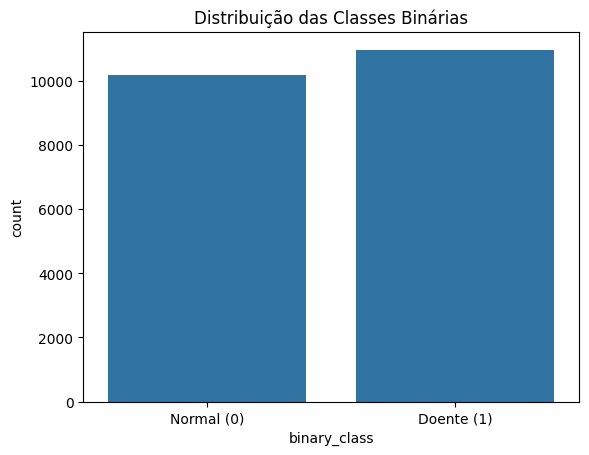

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='binary_class')
plt.title('Distribuição das Classes Binárias')
plt.xticks([0, 1], ['Normal (0)', 'Doente (1)'])
plt.show()


### Dados de treino, validação e teste

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Definir as features (X) e o target (y)
X = df['filepath']
y = df['binary_class']

# Divisão inicial em treino + validação e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Divisão de treino + validação em treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
) # 0.25 de 0.8 é 0.2, resultando em 60/20/20

# Criar dataframes explícitos para treino, validação e teste
df_train = pd.DataFrame({'filepath': X_train, 'label': y_train}).reset_index(drop=True)
df_val = pd.DataFrame({'filepath': X_val, 'label': y_val}).reset_index(drop=True)
df_test = pd.DataFrame({'filepath': X_test, 'label': y_test}).reset_index(drop=True)

# Converter os labels para string (requisito do flow_from_dataframe com class_mode="binary")
df_train['label'] = df_train['label'].astype(str)
df_val['label'] = df_val['label'].astype(str)
df_test['label'] = df_test['label'].astype(str)


print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de validação: {len(X_val)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

# Verificar a distribuição nas classes binárias em cada conjunto
print("\nDistribuição nas classes binárias:")
print("Treino:\n", y_train.value_counts(normalize=True))
print("Validação:\n", y_val.value_counts(normalize=True))
print("Teste:\n", y_test.value_counts(normalize=True))

Tamanho do conjunto de treino: 12699
Tamanho do conjunto de validação: 4233
Tamanho do conjunto de teste: 4233

Distribuição nas classes binárias:
Treino:
 binary_class
1    0.518466
0    0.481534
Name: proportion, dtype: float64
Validação:
 binary_class
1    0.518309
0    0.481691
Name: proportion, dtype: float64
Teste:
 binary_class
1    0.518545
0    0.481455
Name: proportion, dtype: float64


Tamanho do conjunto de treino: 12699
* Indica que 12.699 imagens serão usadas para treinar o modelo.

Tamanho do conjunto de validação: 4233
* 4.233 imagens serão usadas durante o treinamento para validar o desempenho do modelo em dados que ele não viu durante a etapa de aprendizado. Isso ajuda a monitorar o overfitting.

Tamanho do conjunto de teste: 4233
* 4.233 imagens serão usadas após o treinamento para avaliar o desempenho final do modelo em dados completamente novos e não vistos durante o treino ou validação.

Distribuição nas classes binárias:
* Esta seção mostra a proporção (percentual) de imagens da classe '1' (Doente) e '0' (Normal) em cada um dos conjuntos.
* Treino: Aproximadamente 51.85% das imagens de treino são da classe 'Doente' e 48.15% são da classe 'Normal'.
* Validação: A distribuição é muito similar, com cerca de 51.83% 'Doente' e 48.17% 'Normal'.
* Teste: Novamente, a distribuição é próxima, com cerca de 51.85% 'Doente' e 48.15% 'Normal'.

### Preparação

**Parâmetros**

In [ ]:
# Definindo parâmetros
batch_size = 32
img_height = 150
img_width = 150
epochs = 30

**Preparação da estrutura de diretórios**

Como vamos usar `flow_from_directory`, precisamos criar uma estrutura de pastas onde cada subpasta representa uma classe.

In [ ]:
import os
import shutil

# Definindo os diretórios base para os conjuntos de treino, validação e teste
train_dir = '/content/dataset_full_flow/train'
val_dir = '/content/dataset_full_flow/validation'
test_dir_flow = '/content/dataset_full_flow/test'

# Limpar diretórios anteriores, se existirem
if os.path.exists('/content/dataset_full_flow'):
    shutil.rmtree('/content/dataset_full_flow')

# Criar estrutura de diretórios: base_dir/subset/class
os.makedirs(os.path.join(train_dir, '0')) # Classe Normal
os.makedirs(os.path.join(train_dir, '1')) # Classe Doente
os.makedirs(os.path.join(val_dir, '0'))   # Classe Normal
os.makedirs(os.path.join(val_dir, '1'))   # Classe Doente
os.makedirs(os.path.join(test_dir_flow, '0')) # Classe Normal
os.makedirs(os.path.join(test_dir_flow, '1')) # Classe Doente


print("Estrutura de diretórios criada.")

Estrutura de diretórios criada.


**Copiando imagens para a nova estrutura de diretórios**

Copiamos as imagens dos DataFrames (`df_train`, `df_val`, `df_test`) para a estrutura de diretórios criada.

In [ ]:
import os
import shutil

# Função auxiliar para copiar arquivos
def copy_images(dataframe, base_dest_dir):
    for index, row in dataframe.iterrows():
        src_path = row['filepath']
        label = str(row['label']) # Garantir que o label é string para o nome da pasta
        dest_path = os.path.join(base_dest_dir, label, os.path.basename(src_path))
        try:
            # Ensure the destination directory exists
            os.makedirs(os.path.dirname(dest_path), exist_ok=True)
            shutil.copy(src_path, dest_path)
        except FileNotFoundError:
            print(f"Aviso: Arquivo não encontrado em {src_path}. Pulando.")
        except Exception as e:
            print(f"Erro ao copiar arquivo {src_path}: {e}")


print("Copiando imagens de treino...")
copy_images(df_train, train_dir)
print("Copiando imagens de validação...")
copy_images(df_val, val_dir)
print("Copiando imagens de teste...")
copy_images(df_test, test_dir_flow)

print("Cópia de imagens concluída.")

Copiando imagens de treino...
Copiando imagens de validação...
Copiando imagens de teste...
Cópia de imagens concluída.


### Pré-processamento de imagem

Criamos os geradores de dados utilizando `ImageDataGenerator` e aumentos de dados.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criando geradores de dados para pré-processamento e aumento de dados
# Aplicamos rescale em ambos os geradores (treino e validação/teste)
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

# Para validação e teste, apenas rescale
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)


# Carregando e pré-processando as imagens do diretório de treino
train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    seed=42
)

# Carregando e pré-processando as imagens do diretório de validação
validation_data_gen = validation_image_generator.flow_from_directory(
    directory=val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    seed=42
)

# Carregando e pré-processando as imagens do diretório de teste
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir_flow,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=42
)

Found 12699 images belonging to 2 classes.
Found 4233 images belonging to 2 classes.
Found 4233 images belonging to 2 classes.


### Construção do modelo CNN

**Justificativa da Escolha da Arquitetura CNN no modelo binário**

No modelo binário, optamos por construir uma Convolutional Neural Network (CNN) "do zero", em contraste com a utilização de modelos pré-treinados como EfficientNetB0 ou MobileNetV2 **explorados em outros experimentos (ternário e quartenário**).

Esta CNN construída tem um **tempo de execução e treinamento do modelo** mais rápidos do que as outras. Arquiteturas pré-treinadas, embora poderosas e capazes de transferir conhecimento de grandes datasets (como ImageNet), frequentemente possuem um número muito maior de parâmetros, o que pode resultar em:

1.  **Tempo de Treinamento Mais Longo:** Modelos maiores exigem mais recursos computacionais e tempo para convergir durante o treinamento.
2.  **Tempo de Inferência Mais Lento:** A execução do modelo em novas imagens (inferência) pode ser mais demorada devido à complexidade e ao número de operações.

Ao construir uma CNN personalizada, pudemos projetar uma arquitetura mais leve e específica para a tarefa de classificação binária de radiografias torácicas. Isso permitiu um ciclo de experimentação mais rápido e um modelo potencialmente mais eficiente em termos de recursos para uma **aplicação de triagem em cenários de emergência, onde a velocidade de processamento é crucial**.

Embora modelos pré-treinados possam atingir acurácias ligeiramente superiores (o que pode ser útil nos outros modelos mais "diagnósticos"), a escolha de uma CNN do zero neste contexto priorizou a **eficiência computacional** e o **tempo de resposta**, aspectos fundamentais para a viabilidade prática da solução proposta.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # Importando BatchNormalization e Dropout
from tensorflow.keras.optimizers import Adam # Importando Adam para configurar a taxa de aprendizado

# Construindo o modelo CNN aprimorado
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(img_height, img_width ,3)),
    MaxPooling2D(),

    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid') # Camada de saída para classificação binária
])

# Compilando o modelo (mantendo o otimizador adam e loss binary_crossentropy)
# Otimizador Adam com uma taxa de aprendizado padrão
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    21,234,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,327,937 (81.36 MB)

 Trainable params: 21,327,937 (81.36 MB)

 Non-trainable params: 0 (0.00 B)

### Compilação e treinamento do modelo

Compilamos o modelo com otimizador 'adam' e loss 'binary_crossentropy', e então iniciamos o treinamento.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('modelo_binario.h5', monitor='val_loss', save_best_only=True)

# Treinando o modelo com pesos de classe
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=validation_data_gen,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7542 - loss: 0.5107

397/397 ━━━━━━━━━━━━━━━━━━━━ 675s 2s/step - accuracy: 0.7543 - loss: 0.5106 - val_accuracy: 0.7966 - val_loss: 0.4518
Epoch 2/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7935 - loss: 0.4427

397/397 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step - accuracy: 0.7936 - loss: 0.4427 - val_accuracy: 0.8226 - val_loss: 0.3992
Epoch 3/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8135 - loss: 0.4143

397/397 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.8135 - loss: 0.4142 - val_accuracy: 0.8249 - val_loss: 0.3872
Epoch 4/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8249 - loss: 0.3901

397/397 ━━━━━━━━━━━━━━━━━━━━ 699s 2s/step - accuracy: 0.8249 - loss: 0.3901 - val_accuracy: 0.8346 - val_loss: 0.3662
Epoch 5/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8343 - loss: 0.3789

397/397 ━━━━━━━━━━━━━━━━━━━━ 704s 2s/step - accuracy: 0.8343 - loss: 0.3789 - val_accuracy: 0.8495 - val_loss: 0.3499
Epoch 6/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8542 - loss: 0.3411

397/397 ━━━━━━━━━━━━━━━━━━━━ 675s 2s/step - accuracy: 0.8542 - loss: 0.3411 - val_accuracy: 0.8625 - val_loss: 0.3291
Epoch 7/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8577 - loss: 0.3222

397/397 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.8577 - loss: 0.3222 - val_accuracy: 0.8616 - val_loss: 0.3219
Epoch 8/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8775 - loss: 0.2981

397/397 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.8775 - loss: 0.2981 - val_accuracy: 0.8668 - val_loss: 0.3213
Epoch 9/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8788 - loss: 0.2916

397/397 ━━━━━━━━━━━━━━━━━━━━ 684s 2s/step - accuracy: 0.8788 - loss: 0.2915 - val_accuracy: 0.8727 - val_loss: 0.3052
Epoch 10/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8847 - loss: 0.2755

397/397 ━━━━━━━━━━━━━━━━━━━━ 711s 2s/step - accuracy: 0.8847 - loss: 0.2755 - val_accuracy: 0.8845 - val_loss: 0.2904
Epoch 11/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8958 - loss: 0.2591

397/397 ━━━━━━━━━━━━━━━━━━━━ 712s 2s/step - accuracy: 0.8958 - loss: 0.2591 - val_accuracy: 0.8932 - val_loss: 0.2630
Epoch 12/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 659s 2s/step - accuracy: 0.8989 - loss: 0.2474 - val_accuracy: 0.8868 - val_loss: 0.2808
Epoch 13/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 694s 2s/step - accuracy: 0.9027 - loss: 0.2429 - val_accuracy: 0.8852 - val_loss: 0.2871
Epoch 14/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 666s 2s/step - accuracy: 0.9108 - loss: 0.2217 - val_accuracy: 0.8939 - val_loss: 0.2711
Epoch 15/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 699s 2s/step - accuracy: 0.9146 - loss: 0.2229 - val_accuracy: 0.8916 - val_loss: 0.2883
Epoch 16/30
397/397 ━━━━━━━━━━━━━━━━━━━━ 668s 2s/step - accuracy: 0.9141 - loss: 0.2105 - val_accuracy: 0.8828 - val_loss: 0.3045


### Análise do desempenho do modelo

Após o treinamento, avaliamos o desempenho final do modelo no conjunto de teste.

In [ ]:
# Avaliando o modelo no conjunto de teste
loss_test, accuracy_test = model.evaluate(test_data_gen)

print(f"Loss no conjunto de Teste: {loss_test:.4f}")
print(f"Acurácia no conjunto de Teste: {accuracy_test:.4f}")

133/133 ━━━━━━━━━━━━━━━━━━━━ 52s 388ms/step - accuracy: 0.9210 - loss: 0.2203
Loss no conjunto de Teste: 0.2358
Acurácia no conjunto de Teste: 0.9093


### Interpretação dos Resultados no Conjunto de Teste

Com base nos resultados da avaliação do modelo no conjunto de teste:

*   **Loss no conjunto de Teste: 0.2358**
  * A "loss" (perda) é uma medida de quão bem o modelo está prevendo os rótulos das imagens. Um valor de perda mais baixo indica que o modelo está fazendo previsões mais próximas dos rótulos reais.
  * Neste caso, uma loss de aproximadamente 0.24 é um valor relativamente baixo. Isso sugere que o modelo aprendeu a distinguir entre as classes 'Normal' e 'Doente' de forma eficaz no conjunto de teste, com um erro de previsão baixo.


*   **Acurácia no conjunto de Teste: 0.9094**
  * A acurácia mede a proporção de previsões corretas feitas pelo modelo no conjunto de teste. Uma acurácia de aproximadamente 90.93% significa que o modelo classificou corretamente quase 91% das imagens no conjunto de teste.
  * Isso sugere que o modelo conseguiu aprender padrões visuais que permitem diferenciar as imagens 'doentes' das 'normais' com alta precisão em dados que ele nunca viu durante o treinamento.

**Em resumo:**

Os resultados no conjunto de teste mostram que o modelo CNN treinado no dataset completo teve um excelente desempenho para a tarefa de classificação binária. A baixa perda e a alta acurácia indicam que o modelo é capaz de prever corretamente se um raio-X de tórax mostra sinais de doença pulmonar (COVID, Pneumonia Viral, Lung Opacity) ou se é normal, com uma taxa de acerto acima de 90% no conjunto de teste.

Este modelo binário pode ser um passo útil para a triagem inicial, ajudando a identificar radiografias que merecem uma análise mais detalhada por especialistas.

### Análise do Histórico de Treinamento

Vamos visualizar as curvas de acurácia e perda do modelo durante as épocas de treinamento e validação. Isso nos ajuda a entender se o modelo está aprendendo corretamente, se está sofrendo de overfitting ou underfitting, e em que ponto o treinamento poderia ter sido interrompido (considerando o Early Stopping).

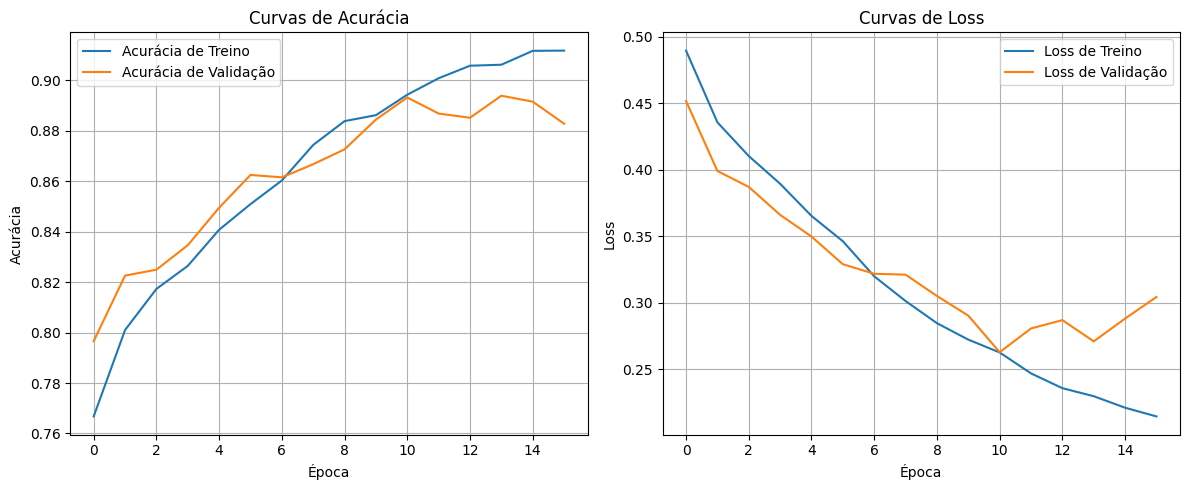

In [ ]:
import matplotlib.pyplot as plt

# Plotar o histórico de acurácia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title('Curvas de Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Plotar o histórico de loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss de Treino')
plt.plot(history.history['val_loss'], label='Loss de Validação')
plt.title('Curvas de Loss')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Avaliação Detalhada do modelo binário no conjunto de teste

Além da acurácia, vamos calcular outras métricas importantes para avaliação de modelos de classificação, como Precisão, Recall e F1-score. Essas métricas fornecem uma visão mais completa do desempenho do modelo, especialmente em relação a falsos positivos e falsos negativos.

133/133 ━━━━━━━━━━━━━━━━━━━━ 51s 380ms/step
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      2038
           1       0.92      0.90      0.91      2195

    accuracy                           0.91      4233
   macro avg       0.91      0.91      0.91      4233
weighted avg       0.91      0.91      0.91      4233


Matriz de Confusão:
 [[1877  161]
 [ 223 1972]]


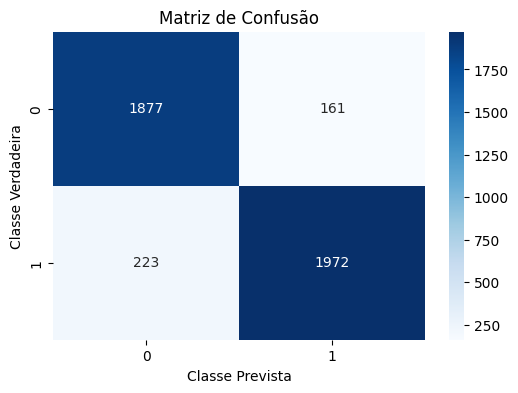

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Obter as previsões do modelo no conjunto de teste
# reset=False é importante para manter a ordem das imagens igual ao test_data_gen.filenames
test_data_gen.reset()
predictions = model.predict(test_data_gen, steps=len(test_data_gen))

# Converter as previsões (probabilidades) para classes binárias (0 ou 1)
# Usamos 0.5 como limiar
predicted_classes = (predictions > 0.5).astype(int)

# Obter os rótulos verdadeiros do conjunto de teste
true_classes = test_data_gen.classes
class_labels = list(test_data_gen.class_indices.keys()) # ['0', '1']

# Gerar o relatório de classificação
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Relatório de Classificação:\n", report)

# Gerar a matriz de confusão
cm = confusion_matrix(true_classes, predicted_classes)
print("\nMatriz de Confusão:\n", cm)

# Visualizar a matriz de confusão
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.show()

### Interpretação do Relatório de Classificação e Matriz de Confusão

Este relatório e matriz fornecem uma análise detalhada do desempenho do modelo de classificação binária no conjunto de teste:

**Relatório de Classificação:**

O relatório mostra as métricas de Precisão, Recall e F1-score para cada classe ('0' - Normal e '1' - Doente), além das médias gerais.

*   **Classe 0 (Normal):**
    *   **Precisão (0.89):** 89% das previsões como 'Normal' estavam corretas.
    *   **Recall (0.92):** 92% dos casos realmente 'Normais' foram identificados corretamente.
    *   **F1-score (0.91):** Bom equilíbrio entre precisão e recall para a classe Normal.
    *   **Support (2038):** Total de casos Normais no teste.
*   **Classe 1 (Doente):**
    *   **Precisão (0.92):** 92% das previsões como 'Doente' estavam corretas.
    *   **Recall (0.90):** 90% dos casos realmente 'Doentes' foram identificados corretamente.
    *   **F1-score (0.91):** Bom equilíbrio entre precisão e recall para a classe Doente.
    *   **Support (2195):** Total de casos Doentes no teste.

*   **Métricas Gerais:**
    *   **Accuracy (0.91):** Acurácia total do modelo (proporção de previsões corretas).
    *   **Macro Avg (0.91):** Média simples das métricas por classe.
    *   **Weighted Avg (0.91):** Média das métricas ponderada pelo número de amostras em cada classe.

### Treinamendo do Modelo "Ternário"

Este modelo foi treinado com a premissa de prever diagnósticos clínicos específicos nesta triagem: **COVID, Pneumonia, Normal**. Isso deixa o modelo mais direto, explicável e aplicável em outros contextos.

Neste modelo consideramos Lung Opacity como um termo genérico, e não diagnóstico. Não foi selecionado pois é uma característica inespecífica que pode estar associada à qualquer outra condição pulmonar, desde o uso de cigarro eletrônico ao câncer, o que pode gerar confusão no modelo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
# Caminhos locais (Colab)
base_path = '/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset'
paths = {
    'COVID': os.path.join(base_path, 'COVID/images'),
    'Normal': os.path.join(base_path, 'Normal/images'),
    'Viral Pneumonia': os.path.join(base_path, 'Viral Pneumonia/images')
}

**Criando um dataframe mais balanceado, com número reduzido de imagens, limitando o número total de imagens por classe.**

In [ ]:
random.seed(42)

# Carregar e limitar "Normal"
covid_files = [os.path.join(paths['COVID'], f) for f in os.listdir(paths['COVID'])]
pneumonia_files = [os.path.join(paths['Viral Pneumonia'], f) for f in os.listdir(paths['Viral Pneumonia'])]
normal_files = random.sample([os.path.join(paths['Normal'], f) for f in os.listdir(paths['Normal'])], 3616)  # Limita para balancear

filepaths = covid_files + pneumonia_files + normal_files
categories = (
    ['2'] * len(covid_files) +
    ['1'] * len(pneumonia_files) +
    ['0'] * len(normal_files)
)

df = pd.DataFrame({
    'filename': filepaths,
    'category': categories
})

Visualização da distribuição

In [ ]:
from collections import Counter

# Contagem de categorias
counts = Counter(df['category'])
total = sum(counts.values())

# Mapeamento de classe para nome
label_map = {
    '0': 'Normal',
    '1': 'Viral Pneumonia',
    '2': 'COVID'
}

print("📊 Distribuição das classes:")
for label, count in counts.items():
    percent = (count / total) * 100
    print(f"- {label_map[label]} ({label}): {count} imagens ({percent:.2f}%)")

📊 Distribuição das classes:
- COVID (2): 3616 imagens (42.16%)
- Viral Pneumonia (1): 1345 imagens (15.68%)
- Normal (0): 3616 imagens (42.16%)


**Nota:** Mesmo com a redução do número de classes "normais", o que igualou a quantidade de "normais" e "covid", ainda assim há uma redução significativa na classe "Viral Pneumonia". Para lidar com isso, **faremos um cálculo de balanceamento de classes** e aplicaremos no treinamento o peso sugerido.

**Divisão estratificada (treino, validação, teste)**

In [ ]:
from sklearn.model_selection import train_test_split

# Separar em treino (80%) e validação/teste (20%)
train_df, test_valid_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['category']
)

# Dividir 50/50 o restante para validação e teste (10% cada)
valid_df, test_df = train_test_split(
    test_valid_df, test_size=0.5, random_state=42, stratify=test_valid_df['category']
)

print(f"Tamanho do conjunto de treino: {len(train_df)}")
print(f"Tamanho do conjunto de validação: {len(valid_df)}")
print(f"Tamanho do conjunto de teste: {len(test_df)}")

Tamanho do conjunto de treino: 6861
Tamanho do conjunto de validação: 858
Tamanho do conjunto de teste: 858


**Geradores de imagem com agumentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='category',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=15
)

valid_generator = val_test_gen.flow_from_dataframe(
    valid_df,
    x_col='filename',
    y_col='category',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=15
)

test_generator = val_test_gen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='category',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=15,
    shuffle=False
)

Found 6861 validated image filenames belonging to 3 classes.
Found 858 validated image filenames belonging to 3 classes.
Found 858 validated image filenames belonging to 3 classes.


**Calcular os pesos das classes (para tratar desbalanceamento)**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Converter categorias para int
labels = df['category'].astype(int)

# Calcular pesos balanceados
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

class_weight_dict = dict(enumerate(class_weights))

print("📌 Pesos por classe calculados:")
for k, v in class_weight_dict.items():
    nome = {0: "Normal", 1: "Viral Pneumonia", 2: "COVID"}[k]
    print(f"- {nome} ({k}): peso {v:.4f}")

📌 Pesos por classe calculados:
- Normal (0): peso 0.7907
- Viral Pneumonia (1): peso 2.1257
- COVID (2): peso 0.7907


### Criação e Compilação do Modelo "Ternário"

**Considerações importantes sobre a escolha do modelo:**

Anteriormente foi realizada uma tentativa de treino com outros modelos, por uma recomendação de serem modelos de maior acurácia médica. Entretando, modelos eficientes (visão computacional avançada) como **ResNet50** e **VGG16** foram descartados devido às condições de processamento (infraestrutura) atuais, o tempo de execução do treinamento do modelo estava extremamente longo por serem modelos mais pesados e robustos, o que influenciou na troca para um modelo mais rápido e leve. O modelo foi substituído pelo **MobileNetV2**, que é um modelo CNN leve de 53 camadas, com um número menor de parâmetros e um tamanho de entrada de 224 × 224.

**Quando escolher cada um?**
- MobileNetV2: Se você precisa de desempenho rápido em dispositivos com poucos recursos, como smartphones ou aplicações embarcadas. É bom mas é inferior ao ResNet50.
- ResNet50: Ideal se o foco é máxima acurácia e você tem infraestrutura robusta (como GPUs) para treinar e rodar o modelo. Visão computacional avançada...


**Criar e compilar o modelo com MobileNetV2**

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congela camadas
for layer in mobilenet.layers:
    layer.trainable = False

# Adiciona camadas
x = mobilenet.output
x = AveragePooling2D(pool_size=(4, 4))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(3, activation='softmax')(x)

# Cria o modelo
model = Model(inputs=mobilenet.input, outputs=output)

# Compila
model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['accuracy'])

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

**Treinamento do modelo com class_weight**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("melhor_modelo.h5", monitor='val_accuracy', save_best_only=True, verbose=1)
early = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=20,
    callbacks=[checkpoint, early],
    class_weight=class_weight_dict #balanceamento
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5527 - loss: 0.9944
Epoch 1: val_accuracy improved from -inf to 0.78205, saving model to melhor_modelo.h5


458/458 ━━━━━━━━━━━━━━━━━━━━ 569s 1s/step - accuracy: 0.5530 - loss: 0.9938 - val_accuracy: 0.7821 - val_loss: 0.5073
Epoch 2/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7545 - loss: 0.4878
Epoch 2: val_accuracy improved from 0.78205 to 0.80070, saving model to melhor_modelo.h5


458/458 ━━━━━━━━━━━━━━━━━━━━ 506s 1s/step - accuracy: 0.7546 - loss: 0.4878 - val_accuracy: 0.8007 - val_loss: 0.4421
Epoch 3/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - accuracy: 0.7849 - loss: 0.4379
Epoch 3: val_accuracy improved from 0.80070 to 0.80420, saving model to melhor_modelo.h5


458/458 ━━━━━━━━━━━━━━━━━━━━ 518s 1s/step - accuracy: 0.7849 - loss: 0.4379 - val_accuracy: 0.8042 - val_loss: 0.4318
Epoch 4/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 946ms/step - accuracy: 0.7927 - loss: 0.4099
Epoch 4: val_accuracy improved from 0.80420 to 0.81935, saving model to melhor_modelo.h5


458/458 ━━━━━━━━━━━━━━━━━━━━ 516s 1s/step - accuracy: 0.7927 - loss: 0.4099 - val_accuracy: 0.8193 - val_loss: 0.3926
Epoch 5/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 984ms/step - accuracy: 0.8207 - loss: 0.3724
Epoch 5: val_accuracy improved from 0.81935 to 0.82168, saving model to melhor_modelo.h5


458/458 ━━━━━━━━━━━━━━━━━━━━ 533s 1s/step - accuracy: 0.8207 - loss: 0.3724 - val_accuracy: 0.8217 - val_loss: 0.3854
Epoch 6/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - accuracy: 0.8151 - loss: 0.3630
Epoch 6: val_accuracy improved from 0.82168 to 0.84033, saving model to melhor_modelo.h5


458/458 ━━━━━━━━━━━━━━━━━━━━ 493s 1s/step - accuracy: 0.8151 - loss: 0.3629 - val_accuracy: 0.8403 - val_loss: 0.3546
Epoch 7/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 903ms/step - accuracy: 0.8260 - loss: 0.3561
Epoch 7: val_accuracy improved from 0.84033 to 0.86247, saving model to melhor_modelo.h5


458/458 ━━━━━━━━━━━━━━━━━━━━ 457s 998ms/step - accuracy: 0.8260 - loss: 0.3561 - val_accuracy: 0.8625 - val_loss: 0.3469
Epoch 8/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 918ms/step - accuracy: 0.8297 - loss: 0.3517
Epoch 8: val_accuracy did not improve from 0.86247
458/458 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.8297 - loss: 0.3516 - val_accuracy: 0.8205 - val_loss: 0.4021
Epoch 9/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 851ms/step - accuracy: 0.8367 - loss: 0.3345
Epoch 9: val_accuracy did not improve from 0.86247
458/458 ━━━━━━━━━━━━━━━━━━━━ 468s 928ms/step - accuracy: 0.8367 - loss: 0.3345 - val_accuracy: 0.8543 - val_loss: 0.3453
Epoch 10/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 914ms/step - accuracy: 0.8319 - loss: 0.3448
Epoch 10: val_accuracy did not improve from 0.86247
458/458 ━━━━━━━━━━━━━━━━━━━━ 460s 1s/step - accuracy: 0.8320 - loss: 0.3448 - val_accuracy: 0.8590 - val_loss: 0.3551
Epoch 11/20
458/458 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 0.8439 - loss: 0.3237
Epoch 11: val_

**Avaliação e visualização do modelo "ternário" com MobileNetV2**

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 39s 678ms/step - accuracy: 0.8829 - loss: 0.3272
Acurácia no conjunto de teste: 0.8706


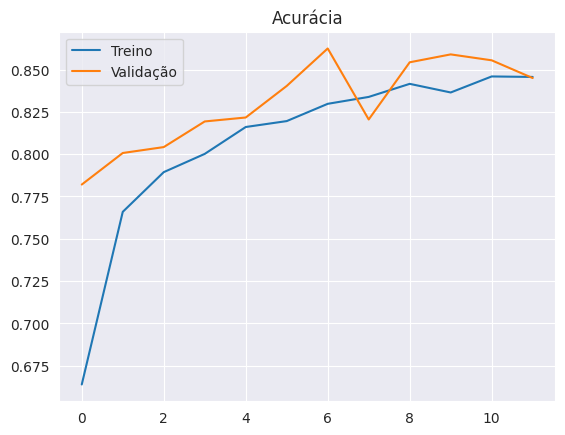

In [ ]:
# Avaliação
loss, acc = model.evaluate(test_generator)
print(f"Acurácia no conjunto de teste: {acc:.4f}")

# Curvas de aprendizado
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.legend()
plt.title("Acurácia")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 660ms/step


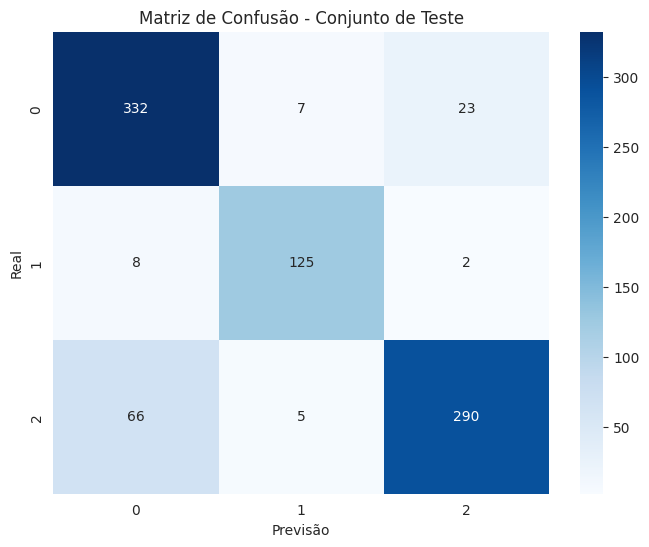


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.82      0.92      0.86       362
           1       0.91      0.93      0.92       135
           2       0.92      0.80      0.86       361

    accuracy                           0.87       858
   macro avg       0.88      0.88      0.88       858
weighted avg       0.88      0.87      0.87       858



In [ ]:
# Obter as previsões no conjunto de teste
test_generator.reset()
pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(pred, axis=1)
y_true = test_generator.classes

# Mapeamento de índice para nome da classe
label_map = {v: k for k, v in train_generator.class_indices.items()}
true_labels = [label_map[i] for i in y_true]
predicted_labels = [label_map[i] for i in y_pred]

# Gerar matriz de confusão
cm = confusion_matrix(true_labels, predicted_labels, labels=list(label_map.values()))

# Visualizar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_map.values()),
            yticklabels=list(label_map.values()))
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Conjunto de Teste')
plt.show()

# Exibir métricas de classificação
from sklearn.metrics import classification_report

print("\nRelatório de Classificação:")
print(classification_report(true_labels, predicted_labels, target_names=list(label_map.values())))


### **Conclusão sobre o Relatório de Classificação (Modelo MobileNetV2)**

Com base no relatório de classificação atualizado, podemos tirar as seguintes conclusões sobre o desempenho do modelo MobileNetV2 no conjunto de teste:

- **Acurácia Geral (accuracy: 0.87)**  
  O modelo acertou 87% das classificações no conjunto de teste. Esse valor indica um bom desempenho global. Como o dataset é desbalanceado, é essencial observar as métricas por classe.

#### **Métricas por Classe**

- **Classe 0 (Normal):**
  - **Precisão:** 0.82 — Das imagens que o modelo previu como "Normal", 82% realmente eram dessa classe.
  - **Recall:** 0.92 — O modelo identificou corretamente 92% das imagens verdadeiramente "Normal".
  - **F1-score:** 0.86 — Um equilíbrio satisfatório entre precisão e recall, mostrando que o modelo é eficaz em detectar a classe "Normal".
  - **Support:** 362 imagens no conjunto de teste.

- **Classe 1 (Viral Pneumonia):**
  - **Precisão:** 0.91 — Das previsões para "Viral Pneumonia", 91% estavam corretas.
  - **Recall:** 0.93 — O modelo conseguiu identificar corretamente 93% dos casos reais dessa classe.
  - **F1-score:** 0.92 — O mais alto entre as classes, mostrando que o modelo é particularmente eficiente em identificar essa condição.
  - **Support:** 135 imagens (classe menos representada).

- **Classe 2 (COVID):**
  - **Precisão:** 0.92 — O modelo teve alto grau de confiança nas classificações de "COVID", com 92% de acerto entre as previsões.
  - **Recall:** 0.80 — O menor entre as classes, o que sugere que o modelo deixou de identificar corretamente 20% dos casos reais de COVID.
  - **F1-score:** 0.86 — Embora o recall tenha sido menor, a boa precisão ajuda a manter um f1-score equilibrado.
  - **Support:** 361 imagens.

#### **Médias**

- **Macro Avg:**
  - Precisão, Recall e F1-score: 0.88  
  Essa média considera todas as classes com o mesmo peso, útil para entender o desempenho médio geral.

- **Weighted Avg:**
  - Precisão, Recall e F1-score: 0.87  
  Esta média leva em conta o número de amostras por classe. Reflete melhor o desempenho geral do modelo considerando a distribuição real do dataset.

### **Resumo Final**

O modelo MobileNetV2 manteve um desempenho sólido, com **87% de acurácia geral** e bons resultados para todas as classes. Ele continua se destacando especialmente na detecção de **"Viral Pneumonia"** (F1-score: 0.92), e apresenta **ótima precisão para "COVID" (0.92)**, embora com um **recall mais baixo (0.80)** – o que indica que alguns casos da doença podem não estar sendo detectados.

Essa limitação pode ser crítica dependendo do objetivo da aplicação. Se o foco for evitar falsos negativos para COVID, essa seria a principal área de melhoria. Ainda assim, o uso de técnicas como `class_weight` provavelmente ajudou a suavizar os impactos do desbalanceamento do conjunto de dados.

Esta análise sugere que modelos de visão computacional são capazes de distinguir a COVID-19 de outras condições pulmonares e casos normais com uma boa precisão e recall, respondendo positivamente à segunda parte da pergunta de pesquisa ("...e os modelos de visão computacional conseguem distinguir a COVID de outras doenças pulmonares?"). A primeira parte da pergunta ("Quais são os principais padrões radiológicos...") foi abordada qualitativamente na Etapa 7.

🧠 **Interpretação Diagnóstica**

✅ Viral Pneumonia: a classe mais bem detectada pelo modelo. Tem desempenho excelente (F1-score de 0.92).

⚠️ COVID: o recall permaneceu baixo (0.80) — ou seja, 1 em cada 5 casos de COVID pode passar despercebido, o que pode ser crítico em um cenário clínico. Apesar disso, a precisão aumentou, o que significa que, quando o modelo diz que é COVID, ele acerta com mais frequência.

⚖️ Normal: bom no recall (detecta mais casos verdadeiros), mas a precisão caiu (mais falsos positivos). Pode gerar mais alarmes falsos de "normal" quando não é — o que não é ideal em triagem médica.

### Modelo Quartenário

Neste modelo, o qual nós denominamos de **"Quaternário"**, nós optamos por considerar todas as 4 classes pensando na premissa de uma maior especificidade diagnóstica, ou seja, um modelo que é mais amplo em termos diagnósticos, ainda que a classe Lung_Opacity seja inespecífica.



**Balanceamento dos dados (antes da divisão)**

* Undersampling das classes majoritárias para reduzir viés.

* Oversampling com aumento de dados nas minoritárias (COVID, Pneumonia viral).

In [ ]:
import os
import shutil
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
# Caminhos
base = '/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset'
classes = ['COVID', 'Normal', 'Viral Pneumonia', 'Lung_Opacity']
output_dir = '/content/data_balanced'
img_size = (224, 224)

# Criar estrutura de diretórios
for split in ['train', 'val', 'test']:
    for cls in classes:
        os.makedirs(os.path.join(output_dir, split, cls), exist_ok=True)

# Coletar imagens e descobrir a menor quantidade
all_images = []
min_count = float('inf')

for cls in classes:
    folder = os.path.join(base, cls, 'images')
    images = [os.path.join(folder, f) for f in os.listdir(folder)
              if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    min_count = min(min_count, len(images))
    all_images.append((cls, images))

print(f"Quantidade mínima para balanceamento: {min_count} imagens por classe")

# Balancear e dividir (undersampling + divisão)
for cls, images in all_images:
    np.random.shuffle(images)
    subset = images[:min_count]  # undersampling
    train_imgs, valtest_imgs = train_test_split(subset, test_size=0.3, random_state=42)
    val_imgs, test_imgs = train_test_split(valtest_imgs, test_size=0.5, random_state=42)

    for split, img_list in zip(['train', 'val', 'test'], [train_imgs, val_imgs, test_imgs]):
        for img_path in img_list:
            try:
                img = Image.open(img_path)
                img.verify()  # valida imagem
                dest = os.path.join(output_dir, split, cls, os.path.basename(img_path))
                shutil.copy(img_path, dest)
            except:
                print(f"Imagem inválida ignorada: {img_path}")

Quantidade mínima para balanceamento: 1345 imagens por classe


**Resultado:** Agora, todas as classes têm exatamente 1.345 imagens, o que é ideal para um treinamento mais justo e eficaz.

**Separação do conjunto em treino, validação e teste**

Nesta etapa foram separados os conjuntos de treino, validação e teste incluindo a técnica de **aumento de dados (data augmentation)** nas imagens.

Para diferenciar do modelo ternário, o qual utilizamos MobileNetV2, no modelo ternário resolvemos usar EfficientNetB0 para analisar a capacidade de ambos.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input

# Tamanho padrão para EfficientNetB0
img_size = (224, 224)
batch_size = 32

# Aumento de dados no treino com preprocess_input da EfficientNet
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

# Validação e teste também com preprocess_input (sem augmentação)
val_test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Geradores
train_gen = train_datagen.flow_from_directory(
    '/content/data_balanced/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_gen = val_test_datagen.flow_from_directory(
    '/content/data_balanced/val',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = val_test_datagen.flow_from_directory(
    '/content/data_balanced/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3764 images belonging to 4 classes.
Found 808 images belonging to 4 classes.
Found 808 images belonging to 4 classes.


**Explicação do que foi feito nesta etapa:**

O conjunto de treino recebe aumento de dados, que ajuda a generalização do modelo.

Validação e teste não recebem transformação, apenas são normalizados.

O parâmetro shuffle=False no teste garante que a ordem das previsões seja a mesma que os rótulos verdadeiros (importante para métricas depois).

**Definindo o class_weitght (peso das classes)**

Mesmo com o dataset balanceado, usar class_weight ainda pode ajudar, especialmente se houver alguma assimetria nos dados reais (como imagens com mais ruídos em certas classes).

Como já está sendo usado o conjunto balanceado com 1345 por classe, o ideal agora é aplicar pesos baseados em prioridade clínica, não só na quantidade.

**Observação:** Neste modelo, ao invés de "calcular pesos" como realizado antes no modelo "ternário", resolvemos testar pesos manuais escolhidos à dedo (comentado no código abaixo) na tentativa de uma melhorar o desempenho do modelo.

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Obtém os rótulos do gerador de treino
labels = train_gen.classes

# Calcula os pesos das classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

# Converte para dicionário
class_weights = {
    0: 3.0,  # COVID – mais crítico
    1: 1.0,  # Lung Opacity – inespecífico, não queremos que o modelo use muito
    2: 1.0,  # Normal – comum, mas não precisa reforçar
    3: 2.5   # Viral Pneumonia – importante distinguir de COVID
}

### Criação e compilação do modelo "quartenário" usando EfficienteNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Carrega o modelo base sem a top layer (head)
base_model = EfficientNetB0(input_shape=(224, 224, 3),
                             include_top=False,
                             weights='imagenet')

# Congela as camadas do modelo base
base_model.trainable = False

# Adiciona a top personalizada
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

# Cria o modelo final
model = Model(inputs=base_model.input, outputs=output)

# Compila o modelo
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

**Treinamento do modelo**

Usaremos dois callbacks importantes:

**EarlyStopping:** Interrompe o treino se a validação não melhorar após alguns epochs.

**ModelCheckpoint:** Salva o melhor modelo durante o treino (com menor val_loss).


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('modelo_quartenario.h5', monitor='val_loss', save_best_only=True)
]

# Treinamento
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks,
    class_weight=class_weights
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4323 - loss: 1.9898

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 481s 4s/step - accuracy: 0.4331 - loss: 1.9866 - val_accuracy: 0.7067 - val_loss: 0.7361
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6668 - loss: 1.0666

118/118 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 0.6668 - loss: 1.0664 - val_accuracy: 0.7302 - val_loss: 0.6567
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7222 - loss: 0.9304

118/118 ━━━━━━━━━━━━━━━━━━━━ 455s 4s/step - accuracy: 0.7222 - loss: 0.9303 - val_accuracy: 0.7550 - val_loss: 0.6072
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7431 - loss: 0.8698

118/118 ━━━━━━━━━━━━━━━━━━━━ 426s 4s/step - accuracy: 0.7431 - loss: 0.8698 - val_accuracy: 0.7611 - val_loss: 0.5765
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7593 - loss: 0.8322

118/118 ━━━━━━━━━━━━━━━━━━━━ 425s 4s/step - accuracy: 0.7592 - loss: 0.8323 - val_accuracy: 0.7809 - val_loss: 0.5383
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 415s 4s/step - accuracy: 0.7589 - loss: 0.8073 - val_accuracy: 0.7450 - val_loss: 0.5899
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7550 - loss: 0.7977

118/118 ━━━━━━━━━━━━━━━━━━━━ 413s 4s/step - accuracy: 0.7551 - loss: 0.7975 - val_accuracy: 0.8020 - val_loss: 0.5064
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7568 - loss: 0.7940

118/118 ━━━━━━━━━━━━━━━━━━━━ 423s 4s/step - accuracy: 0.7569 - loss: 0.7936 - val_accuracy: 0.8032 - val_loss: 0.4937
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7905 - loss: 0.7288

118/118 ━━━━━━━━━━━━━━━━━━━━ 416s 4s/step - accuracy: 0.7904 - loss: 0.7288 - val_accuracy: 0.8069 - val_loss: 0.4880
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8037 - loss: 0.6749

118/118 ━━━━━━━━━━━━━━━━━━━━ 428s 4s/step - accuracy: 0.8036 - loss: 0.6752 - val_accuracy: 0.8243 - val_loss: 0.4672
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 417s 4s/step - accuracy: 0.7915 - loss: 0.7010 - val_accuracy: 0.7921 - val_loss: 0.4891
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 430s 4s/step - accuracy: 0.7938 - loss: 0.6988 - val_accuracy: 0.8032 - val_loss: 0.4809
Epoch 13/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7715 - loss: 0.7133

118/118 ━━━━━━━━━━━━━━━━━━━━ 425s 4s/step - accuracy: 0.7716 - loss: 0.7131 - val_accuracy: 0.8292 - val_loss: 0.4543
Epoch 14/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 424s 4s/step - accuracy: 0.7927 - loss: 0.6641 - val_accuracy: 0.8267 - val_loss: 0.4594
Epoch 15/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7946 - loss: 0.6379

118/118 ━━━━━━━━━━━━━━━━━━━━ 429s 3s/step - accuracy: 0.7947 - loss: 0.6380 - val_accuracy: 0.8379 - val_loss: 0.4420
Epoch 16/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8119 - loss: 0.6059

118/118 ━━━━━━━━━━━━━━━━━━━━ 412s 3s/step - accuracy: 0.8118 - loss: 0.6060 - val_accuracy: 0.8403 - val_loss: 0.4207
Epoch 17/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8076 - loss: 0.6330

118/118 ━━━━━━━━━━━━━━━━━━━━ 408s 3s/step - accuracy: 0.8076 - loss: 0.6328 - val_accuracy: 0.8391 - val_loss: 0.4143
Epoch 18/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 464s 4s/step - accuracy: 0.8270 - loss: 0.5941 - val_accuracy: 0.8379 - val_loss: 0.4197
Epoch 19/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8166 - loss: 0.6088

118/118 ━━━━━━━━━━━━━━━━━━━━ 450s 4s/step - accuracy: 0.8165 - loss: 0.6089 - val_accuracy: 0.8416 - val_loss: 0.4124
Epoch 20/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8194 - loss: 0.6190

118/118 ━━━━━━━━━━━━━━━━━━━━ 410s 3s/step - accuracy: 0.8194 - loss: 0.6190 - val_accuracy: 0.8416 - val_loss: 0.4025


###Avaliando o modelo quaternário no conjunto de teste e matriz de confusão

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

26/26 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.8298 - loss: 0.4175
Acurácia no conjunto de teste: 0.8490
26/26 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step
                 precision    recall  f1-score   support

          COVID       0.86      0.83      0.84       202
   Lung_Opacity       0.78      0.85      0.81       202
         Normal       0.82      0.73      0.77       202
Viral Pneumonia       0.93      0.99      0.96       202

       accuracy                           0.85       808
      macro avg       0.85      0.85      0.85       808
   weighted avg       0.85      0.85      0.85       808



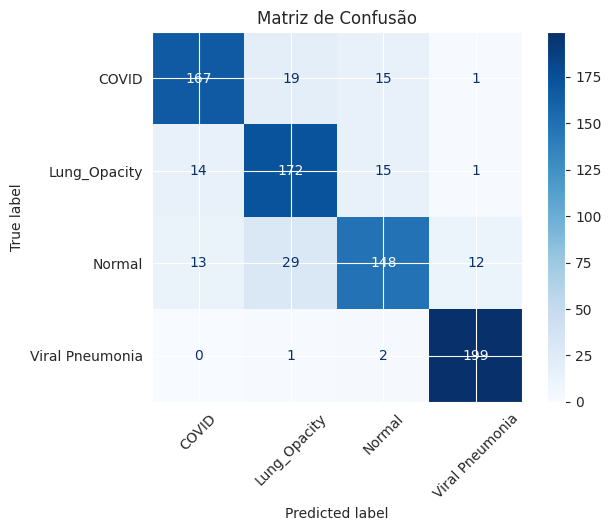

In [ ]:
# Avaliar no conjunto de teste
loss, acc = model.evaluate(test_gen)
print(f"Acurácia no conjunto de teste: {acc:.4f}")

# Obter rótulos verdadeiros e previsões
y_true = test_gen.classes
y_pred_proba = model.predict(test_gen)
y_pred = np.argmax(y_pred_proba, axis=1)

# Nomes das classes
class_names = list(test_gen.class_indices.keys())

# Relatório de classificação
print(classification_report(y_true, y_pred, target_names=class_names))

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matriz de Confusão")
plt.show()

**Análise Final dos Resultados e Interpretação Diagnóstica**

- **Acurácia no conjunto de teste:** 0.8490  
  O modelo apresenta um desempenho geral sólido, com taxa de acerto de aproximadamente 85% no conjunto de teste. Os resultados indicam que ele está apto para tarefas de triagem inicial, mas com pontos específicos a serem otimizados.


**Interpretação das Métricas por Classe**

**COVID**
- **Precisão:** 0.86  
- **Recall:** 0.83  
- **F1-score:** 0.84  

🔍 O modelo tem **bom equilíbrio entre precisão e recall** para COVID. Ele identifica corretamente a maior parte dos casos e, quando classifica como COVID, geralmente acerta. Ainda assim, há uma parcela (~17%) de **casos reais que não estão sendo detectados**, o que deve ser levado em conta, principalmente em cenários clínicos onde falsos negativos são críticos.

**Lung_Opacity**
- **Precisão:** 0.78  
- **Recall:** 0.85  
- **F1-score:** 0.81  

🔍 O modelo demonstra **boa sensibilidade (recall)** para detectar opacidades pulmonares, o que é desejável para evitar que casos suspeitos passem despercebidos. No entanto, a **precisão menor** indica que há certa taxa de **falsos positivos**, o que pode levar a investigações desnecessárias.

**Normal**
- **Precisão:** 0.82  
- **Recall:** 0.73  
- **F1-score:** 0.77  

⚠️ A classe "Normal" apresenta o **menor recall entre todas**, mostrando que o modelo tem maior dificuldade em reconhecer corretamente imagens sem anomalias. Isso significa que há uma quantidade significativa de **falsos negativos**, com imagens normais sendo classificadas como alguma patologia — o que pode gerar preocupações indevidas e exames complementares desnecessários.

**Viral Pneumonia**
- **Precisão:** 0.93  
- **Recall:** 0.99  
- **F1-score:** 0.96  

✅ Excelente desempenho. O modelo é extremamente eficaz na **detecção de casos de pneumonia viral**, com altíssimo recall e precisão. Esta é a classe mais confiável do modelo até o momento.

**Resumo Final**
- O modelo demonstra **bom desempenho geral**, com destaque para a detecção de **pneumonia viral** e **COVID**.
- As principais oportunidades de melhoria estão nas classes:
  - **"Normal"**, devido ao **baixo recall**, o que pode aumentar falsos alarmes.
  - **"Lung_Opacity"**, devido à **baixa precisão**, o que pode causar classificações indevidas.


In [ ]:
import tensorflow as tf
import cv2
from tensorflow.keras.models import Model

# Função para gerar Grad-CAM
def generate_gradcam(model, img_array, class_index, layer_name='Conv_1'):
    # Cria um modelo que mapeia a entrada para as ativações da camada escolhida e à saída final
    grad_model = tf.keras.models.Model(
        [model.input],
        [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    # Gradiente da saída (classe) com relação à camada convolucional
    grads = tape.gradient(loss, conv_outputs)

    # Média dos gradientes ao longo da altura e largura
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiplica cada canal da camada pela média dos gradientes
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # ReLU + normalização
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_159']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


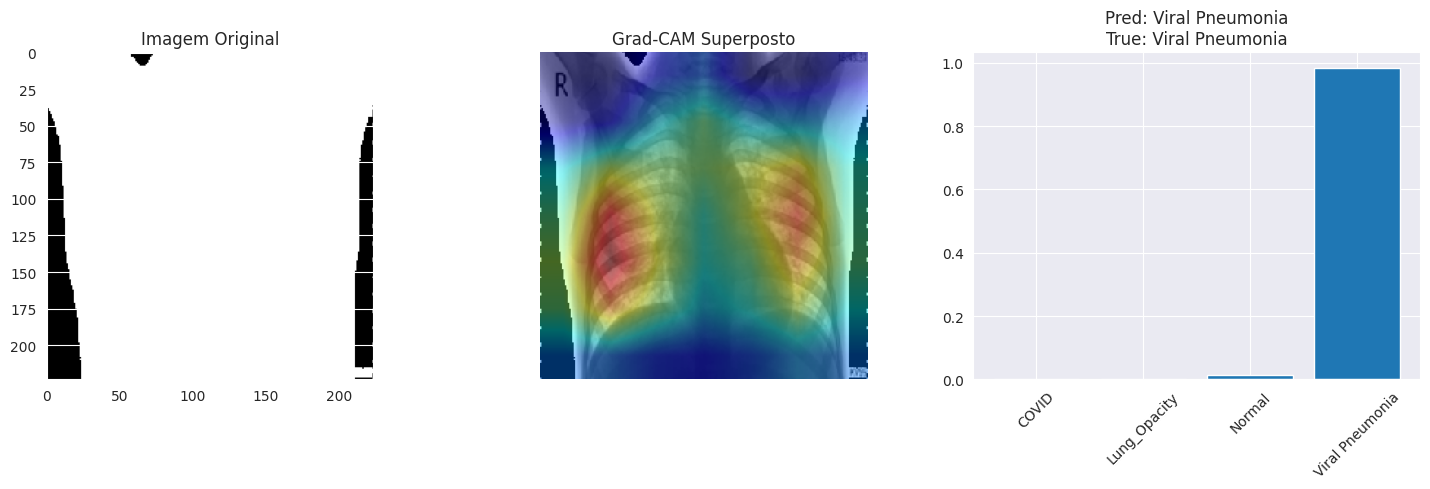

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2

# Pega um batch aleatório
batch_idx = random.randint(0, len(test_gen) - 1)
images, labels = test_gen[batch_idx]

# Pega uma imagem aleatória do batch
img_idx = random.randint(0, len(images) - 1)
img = images[img_idx]
img_input = np.expand_dims(img, axis=0)

# Rótulos
true_label_index = np.argmax(labels[img_idx])
true_label = list(test_gen.class_indices.keys())[true_label_index]

# Previsão
pred_probs = model.predict(img_input)
pred_class = np.argmax(pred_probs)
pred_label = list(test_gen.class_indices.keys())[pred_class]

# Grad-CAM - Use a valid layer name from EfficientNetB0 summary
# Example: 'block7a_project_conv' or another convolutional layer name
try:
    heatmap = generate_gradcam(model, img_input, pred_class, layer_name='block7a_project_conv')

    # Superposição na imagem
    img_resized = cv2.resize(img, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (224, 224))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    # Ensure both images are in the same data type and range before blending
    superimposed_img = cv2.addWeighted((img_resized * 255).astype(np.uint8), 0.6, heatmap_colored, 0.4, 0)


    # Mostrar resultado
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Imagem Original")
    # Display the image correctly after preprocessing (values might not be 0-1)
    plt.imshow(img) # Assuming img is already in a displayable format or matplotlib handles it


    plt.subplot(1, 3, 2)
    plt.title("Grad-CAM Superposto")
    # OpenCV reads and displays in BGR, matplotlib in RGB. Reverse for correct color display.
    plt.imshow(superimposed_img[..., ::-1])
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.bar(range(len(pred_probs[0])), pred_probs[0])
    plt.xticks(range(len(pred_probs[0])), list(test_gen.class_indices.keys()), rotation=45)
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error generating Grad-CAM: {e}")
    print("Please check the layer_name in generate_gradcam function call.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_159']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


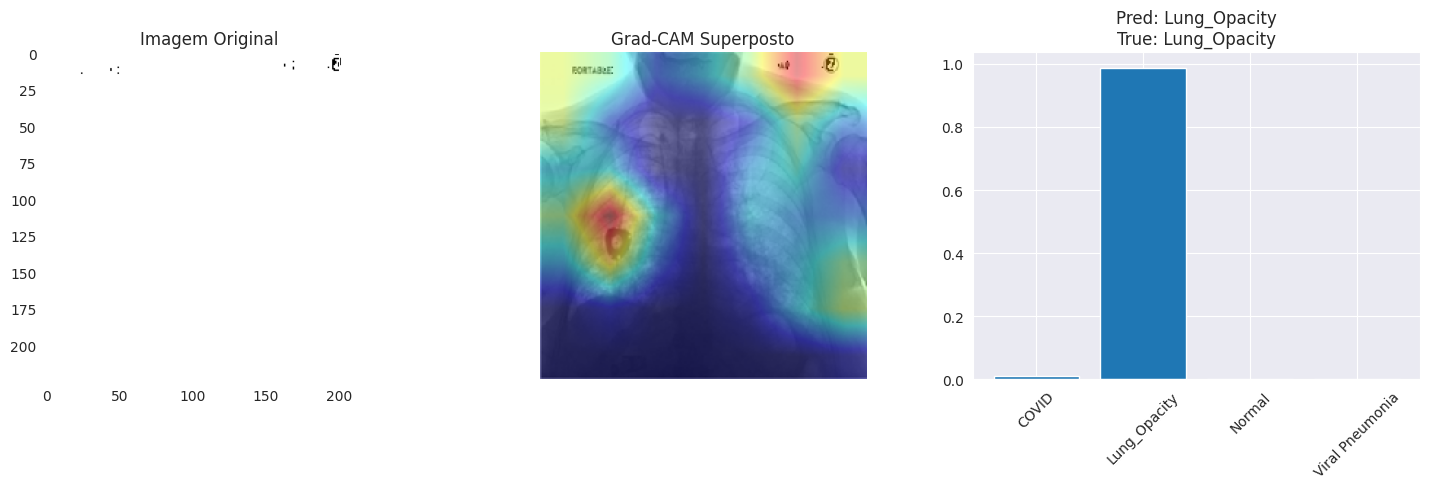

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2

# Pega um batch aleatório
batch_idx = random.randint(0, len(test_gen) - 1)
images, labels = test_gen[batch_idx]

# Pega uma imagem aleatória do batch
img_idx = random.randint(0, len(images) - 1)
img = images[img_idx]
img_input = np.expand_dims(img, axis=0)

# Rótulos
true_label_index = np.argmax(labels[img_idx])
true_label = list(test_gen.class_indices.keys())[true_label_index]

# Previsão
pred_probs = model.predict(img_input)
pred_class = np.argmax(pred_probs)
pred_label = list(test_gen.class_indices.keys())[pred_class]

# Grad-CAM - Use a valid layer name from EfficientNetB0 summary
# Example: 'block7a_project_conv' or another convolutional layer name
try:
    heatmap = generate_gradcam(model, img_input, pred_class, layer_name='block7a_project_conv')

    # Superposição na imagem
    img_resized = cv2.resize(img, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (224, 224))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    # Ensure both images are in the same data type and range before blending
    superimposed_img = cv2.addWeighted((img_resized * 255).astype(np.uint8), 0.6, heatmap_colored, 0.4, 0)


    # Mostrar resultado
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Imagem Original")
    # Display the image correctly after preprocessing (values might not be 0-1)
    plt.imshow(img) # Assuming img is already in a displayable format or matplotlib handles it


    plt.subplot(1, 3, 2)
    plt.title("Grad-CAM Superposto")
    # OpenCV reads and displays in BGR, matplotlib in RGB. Reverse for correct color display.
    plt.imshow(superimposed_img[..., ::-1])
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.bar(range(len(pred_probs[0])), pred_probs[0])
    plt.xticks(range(len(pred_probs[0])), list(test_gen.class_indices.keys()), rotation=45)
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error generating Grad-CAM: {e}")
    print("Please check the layer_name in generate_gradcam function call.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_159']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


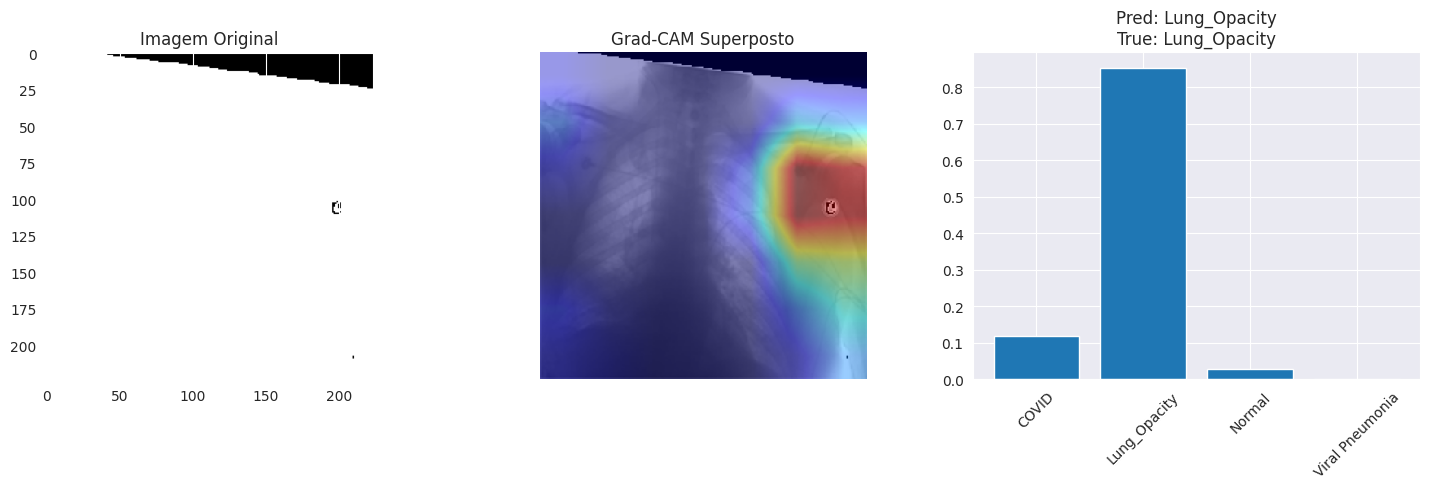

In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2

# Pega um batch aleatório
batch_idx = random.randint(0, len(test_gen) - 1)
images, labels = test_gen[batch_idx]

# Pega uma imagem aleatória do batch
img_idx = random.randint(0, len(images) - 1)
img = images[img_idx]
img_input = np.expand_dims(img, axis=0)

# Rótulos
true_label_index = np.argmax(labels[img_idx])
true_label = list(test_gen.class_indices.keys())[true_label_index]

# Previsão
pred_probs = model.predict(img_input)
pred_class = np.argmax(pred_probs)
pred_label = list(test_gen.class_indices.keys())[pred_class]

# Grad-CAM - Use a valid layer name from EfficientNetB0 summary
# Example: 'block7a_project_conv' or another convolutional layer name
try:
    heatmap = generate_gradcam(model, img_input, pred_class, layer_name='block7a_project_conv')

    # Superposição na imagem
    img_resized = cv2.resize(img, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (224, 224))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    # Ensure both images are in the same data type and range before blending
    superimposed_img = cv2.addWeighted((img_resized * 255).astype(np.uint8), 0.6, heatmap_colored, 0.4, 0)


    # Mostrar resultado
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title("Imagem Original")
    # Display the image correctly after preprocessing (values might not be 0-1)
    plt.imshow(img) # Assuming img is already in a displayable format or matplotlib handles it


    plt.subplot(1, 3, 2)
    plt.title("Grad-CAM Superposto")
    # OpenCV reads and displays in BGR, matplotlib in RGB. Reverse for correct color display.
    plt.imshow(superimposed_img[..., ::-1])
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.bar(range(len(pred_probs[0])), pred_probs[0])
    plt.xticks(range(len(pred_probs[0])), list(test_gen.class_indices.keys()), rotation=45)
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print(f"Error generating Grad-CAM: {e}")
    print("Please check the layer_name in generate_gradcam function call.")